In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

path=""
data_train= pd.read_csv(path + "train.csv")
data_train.head()
data_train.shape
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

data_train["views"]=pd.to_numeric(data_train["views"])
data_train["likes"]=pd.to_numeric(data_train["likes"])
data_train["dislikes"]=pd.to_numeric(data_train["dislikes"])
data_train["comment"]=pd.to_numeric(data_train["comment"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

column_vidid=data_train['vidid']

from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

data_train.head()

import datetime
import time
def checki(x):
 y=x[2:]
 h=''
 m=''
 s=''
 mm=''
 p=['H','M','S']
 for i in y:
   if i not in p:
     mm+=i
   else:
      if (i=="H"):
         h=mm
         mm=''
      elif(i=="M"):
           m=mm
           mm=''
      else:
           s=mm
           mm=''
   if (h==''):
     h=='00'
   if(m==''):
     m=='00'
   if(s==''):
     s=='00'
   bp= h+':'+m+':'+s
   return bp 
 train=pd.read_csv("train.csv")
 mp=pd.read_csv(path + "train.csv")["duration"]
 time_1=mp.apply(checki)
 print(type(time_1))
 print(type(mp))
 print(time_1)
 time1=time_1.apply(func_sec)
 data_train["duration"]=time_1
 data_train.head()


def func_sec(time_string):
    h,m,s= time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)


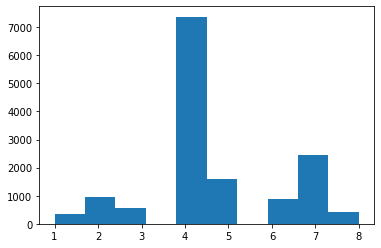

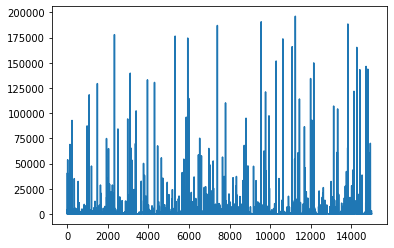

In [ ]:

plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()
data_train = data_train[data_train["adview"]<2000000]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


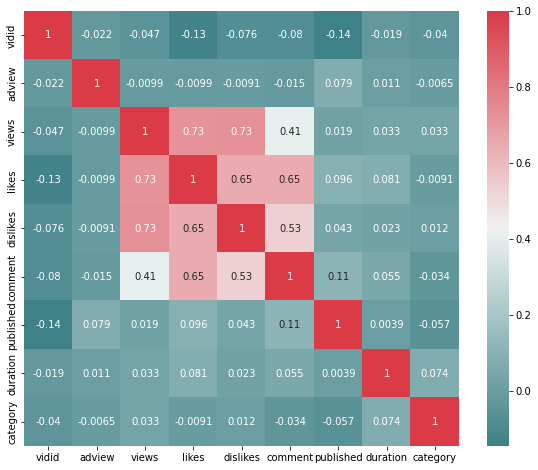

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,2925,6
1,1707,56,2,6,2185,3040,4
2,2023,25,0,2,2094,1863,3
3,620860,777,161,153,2119,2546,8
4,666,1,0,0,2091,1963,4


In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
corr = data_train.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(200,10,as_cmap=True),square=True,ax=ax,annot=True)
plt.show()

Y_train = pd.DataFrame(data= data_train.iloc[:,1].values, columns=['target'])
data_train = data_train.drop(["adview"],axis=1)
data_train = data_train.drop(["vidid"],axis=1)
data_train.head()


In [31]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(data_train,Y_train, test_size=0.2,random_state=42)
X_train.shape

X_train.mean()

views        734443.363535
likes          2824.984172
dislikes        262.511465
comment         419.038330
published      1548.973306
duration       1851.439339
category          4.610455
dtype: float64

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)



In [45]:
from sklearn import metrics
def print_error(X_test,y_test,model_name):
  prediction= model_name.predict(X_test)
  print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test,prediction))
  print('Mean Squared Error : ',metrics.mean_squared_error(y_test,prediction))
  print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

In [46]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train,y_train)
print_error(X_test,y_test,linear_regression)

Mean Absolute Error :  1641.641339526323
Mean Squared Error :  67388655.75902022
Root Mean Squared Error :  8209.059371147234


In [48]:
from sklearn.tree import DecisionTreeRegressor
decision_tree= DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
print_error(X_test,y_test,decision_tree)

Mean Absolute Error :  1820.831279945243
Mean Squared Error :  131251006.35215606
Root Mean Squared Error :  11456.483158114275


In [49]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth= 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators= n_estimators, max_depth= max_depth , min_samples_split= min_samples_split , min_samples_leaf= min_samples_leaf)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test,random_forest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Mean Absolute Error :  1915.0260291020434
Mean Squared Error :  70612106.95080498
Root Mean Squared Error :  8403.101031809922


In [52]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test,supportvector_regressor)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error :  916.6406816913387
Mean Squared Error :  68656453.37137596
Root Mean Squared Error :  8285.918981704803


In [ ]:
from scipy.optimize import optimize
from keras import activations
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                              Dense(6,activation="relu",
                              input_shape=X_train.shape[1:]),
                              Dense(6,activation="relu"),
                              Dense(1)
                              ])


optimizer=keras.optimizers.adam_v2.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer= optimizer, loss= loss, metrics=["mean_squared_error"])
history = ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)


Epoch 1/100
366/366 [==============================] - 1s 2ms/step - loss: 61804092.0000 - mean_squared_error: 61804092.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 61789520.0000 - mean_squared_error: 61789520.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 61753320.0000 - mean_squared_error: 61753320.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 61690928.0000 - mean_squared_error: 61690928.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 61605348.0000 - mean_squared_error: 61605348.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 61510132.0000 - mean_squared_error: 61510132.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 61416680.0000 - mean_squared_error: 61416680.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 61337272.0000 - mean_squared_error: 61337272.0000


In [73]:
import joblib
joblib.dump(decision_tree,"decisiontree_youtubeadview.pkl")
ann.save("youtubeadview.h5")